In [8]:
import warnings
warnings.filterwarnings('ignore')

Accuracy: 0.9497757847533632

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.98      0.97      0.97      1075
           2       0.34      0.50      0.40        36

    accuracy                           0.95      1115
   macro avg       0.77      0.57      0.59      1115
weighted avg       0.96      0.95      0.95      1115


Confusion Matrix:
 [[   1    3    0]
 [   0 1040   35]
 [   0   18   18]]


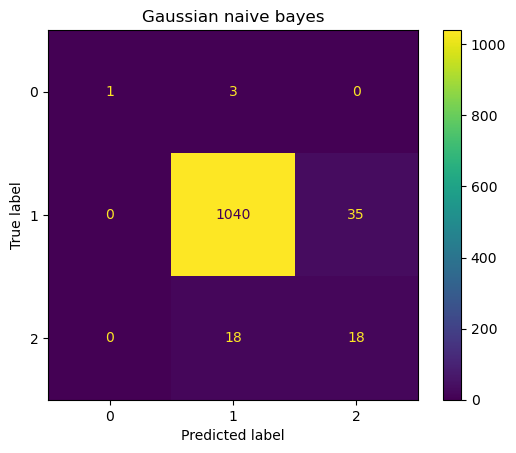

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import string
df = pd.read_csv("./data.csv")
stop = set(stopwords.words('english'))
punctuations = string.punctuation

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuations])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

df['clean_paragraph'] = df['corpus'].apply(preprocess)
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X = vectorizer.fit_transform(df['clean_paragraph']).toarray()
y = df['Relevance']  # Ensure that labels are numerical or encoded
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train , y_train)
y_pred = gnb.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_test_labels = le.inverse_transform((y_test))
y_pred_labels = le.inverse_transform(y_pred)
crgnb = classification_report(y_test_labels, y_pred_labels,output_dict=True)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cmgnb = confusion_matrix(y_test_labels, y_pred_labels)
print("\nConfusion Matrix:\n", cmgnb)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmgnb)
cm_display.plot()
plt.title("Gaussian naive bayes")
plt.show()

<Figure size 640x480 with 0 Axes>

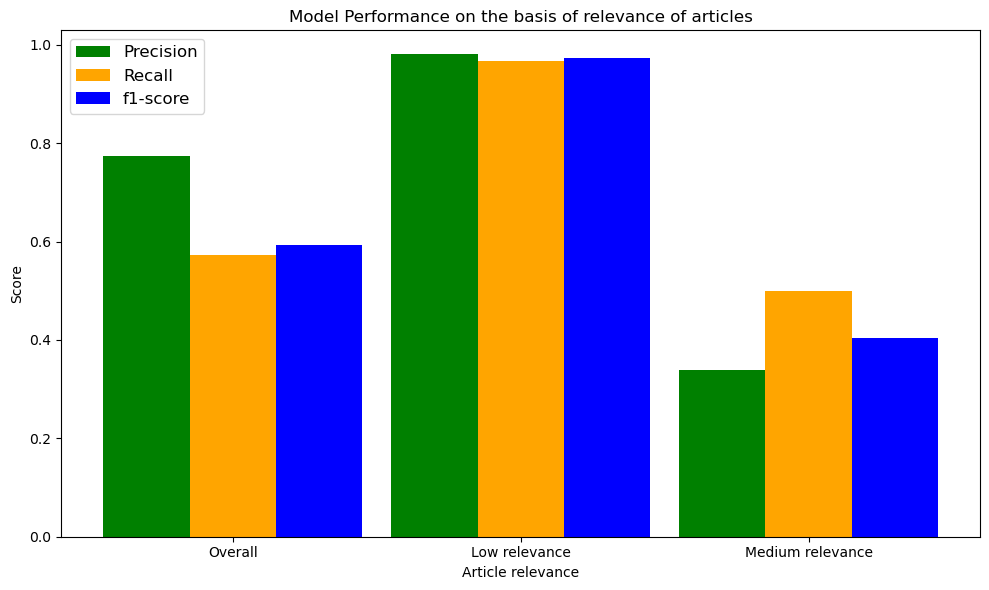

In [28]:
plt.figure()
bar_width = 0.3
x = np.arange(3)
plt.figure(figsize=(10, 6))

# Plot the bars
plt.bar(x - bar_width, [crgnb['macro avg']['precision'], crgnb['Low']['precision'],crgnb['Medium']['precision']], width=bar_width, color='green', label='Precision')
plt.bar(x, [crgnb['macro avg']['recall'], crgnb['Low']['recall'],crgnb['Medium']['recall']], width=bar_width, color='orange', label='Recall')
plt.bar(x + bar_width, [crgnb['macro avg']['f1-score'], crgnb['Low']['f1-score'],crgnb['Medium']['f1-score']], width=bar_width, color='blue', label='f1-score')


# Labeling the x-axis
plt.xticks(x, ['Overall', 'Low relevance','Medium relevance'])

# Adding labels, title, and legend
plt.xlabel('Article relevance')
plt.ylabel('Score')
plt.title('Model Performance on the basis of relevance of articles')
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
crgnb

{'High': {'precision': 1.0, 'recall': 0.25, 'f1-score': 0.4, 'support': 4.0},
 'Low': {'precision': 0.9802073515551367,
  'recall': 0.9674418604651163,
  'f1-score': 0.9737827715355806,
  'support': 1075.0},
 'Medium': {'precision': 0.33962264150943394,
  'recall': 0.5,
  'f1-score': 0.4044943820224719,
  'support': 36.0},
 'accuracy': 0.9497757847533632,
 'macro avg': {'precision': 0.7732766643548569,
  'recall': 0.5724806201550388,
  'f1-score': 0.5927590511860176,
  'support': 1115.0},
 'weighted avg': {'precision': 0.9595958009113109,
  'recall': 0.9497757847533632,
  'f1-score': 0.9533437463260611,
  'support': 1115.0}}

In [12]:
r = []
for i in df.index:
    if df['Normalised'][i]<0.33:
        r.append('Low')
    if 0.33<=df['Normalised'][i]<0.66:
        r.append('Medium')
    if 0.66<=df['Normalised'][i]<=1:
        r.append('High')
df['Relevance'] = r
df.to_csv('data.csv')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
lr = LogisticRegression()
rfc = RandomForestClassifier()
clf = svm.SVC(decision_function_shape='ovo')
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [14]:
lr.fit(X_train , y_train)
rfc.fit(X_train , y_train)
clf.fit(X_train , y_train)
bnb.fit(X_train , y_train)

BernoulliNB()

In [15]:
ylr = lr.predict(X_test)
yrfc = rfc.predict(X_test)
yclf = clf.predict(X_test)
ybnb = bnb.predict(X_test)

In [16]:
acc2 = accuracy_score(y_test, ylr)
acc3 = accuracy_score(y_test, yrfc)
acc4 = accuracy_score(y_test, yclf)
acc5 = accuracy_score(y_test, ybnb)

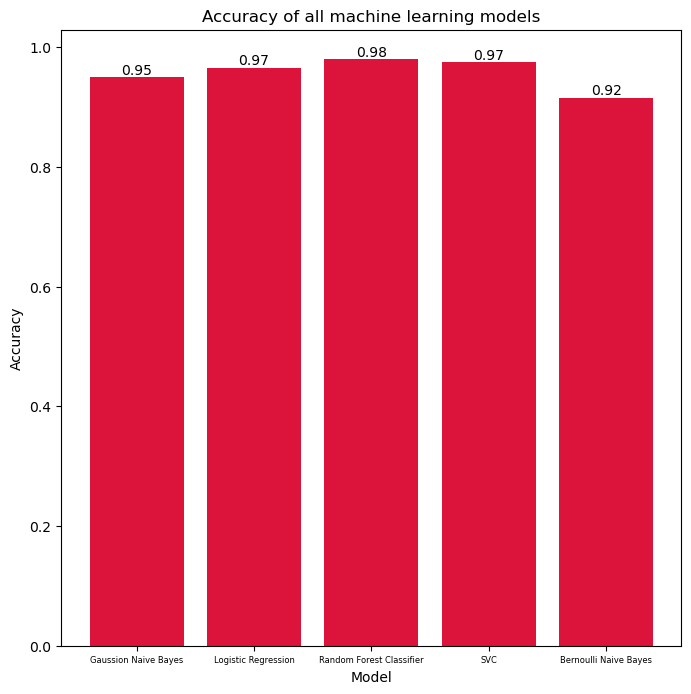

In [17]:
plt.figure(figsize = (8,8))
plt.bar(['Gaussion Naive Bayes','Logistic Regression','Random Forest Classifier','SVC','Bernoulli Naive Bayes'],[acc1,acc2,acc3,acc4,acc5],color = 'crimson')
plt.xticks( size = 6)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of all machine learning models")
for i, value in enumerate([acc1,acc2,acc3,acc4,acc5]):
    plt.text(i, value, str(round(value,2)), ha='center', va='bottom')
plt.show()

In [18]:
cmlr = confusion_matrix(y_test , ylr)
cmrfc = confusion_matrix(y_test , yrfc)
cmsvc = confusion_matrix(y_test , yclf)
cmbnb = confusion_matrix(y_test , ybnb)

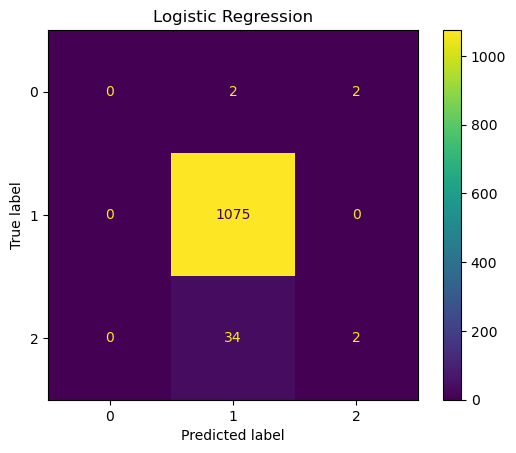

In [19]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmlr)
cm_display.plot()
plt.title("Logistic Regression")
plt.show()

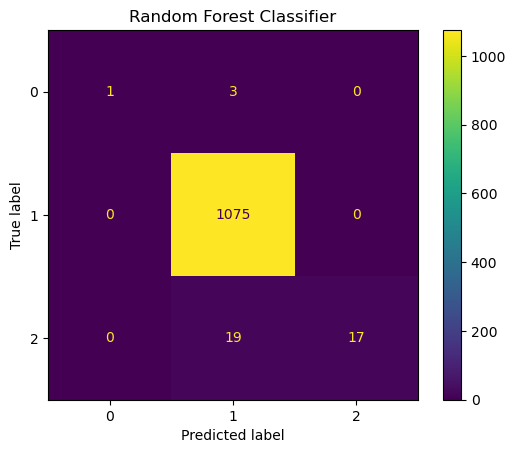

In [20]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmrfc)
cm_display.plot()
plt.title("Random Forest Classifier")
plt.show()

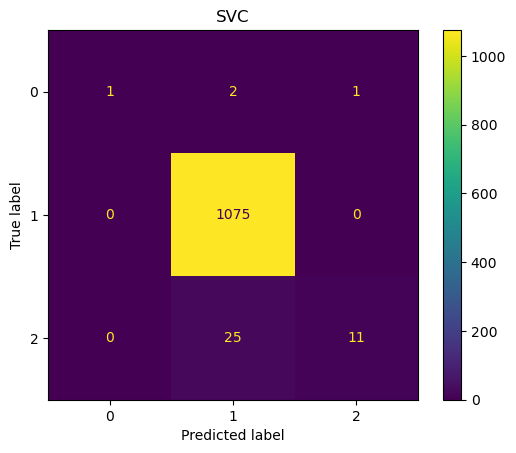

In [21]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmsvc)
cm_display.plot()
plt.title("SVC")
plt.show()

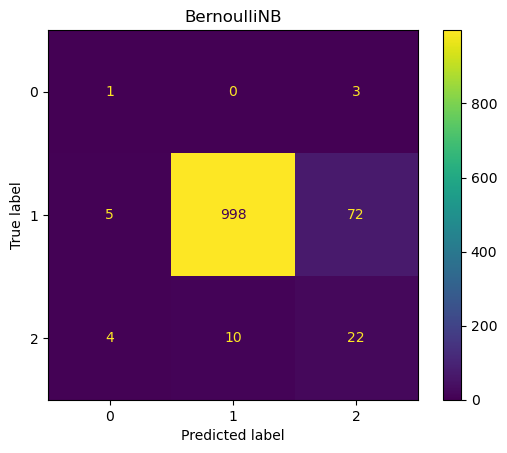

In [22]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmbnb)
cm_display.plot()
plt.title("BernoulliNB")
plt.show()

<Figure size 640x480 with 0 Axes>

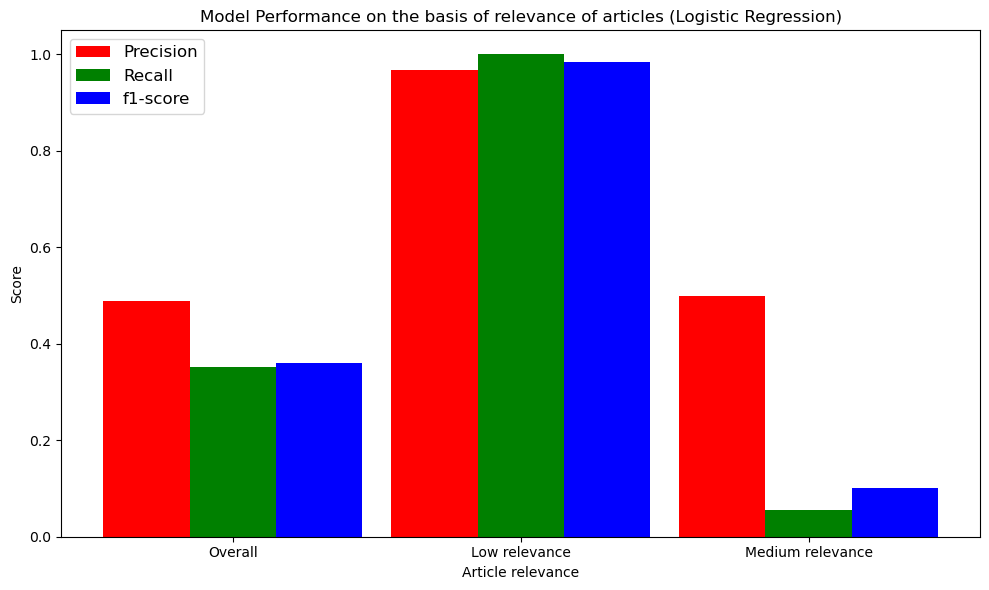

In [ ]:
crlr = classification_report(y_test, ylr,output_dict=True)
plt.figure()
bar_width = 0.3
x = np.arange(3)
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width, [crlr['macro avg']['precision'], crlr['1']['precision'],crlr['2']['precision']], width=bar_width, color='green', label='Precision')
plt.bar(x, [crlr['macro avg']['recall'], crlr['1']['recall'],crlr['2']['recall']], width=bar_width, color='orange', label='Recall')
plt.bar(x + bar_width, [crlr['macro avg']['f1-score'], crlr['1']['f1-score'],crlr['2']['f1-score']], width=bar_width, color='blue', label='f1-score')

plt.xticks(x, ['Overall', 'Low relevance','Medium relevance'])
plt.xlabel('Article relevance')
plt.ylabel('Score')
plt.title('Model Performance on the basis of relevance of articles (Logistic Regression)')
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

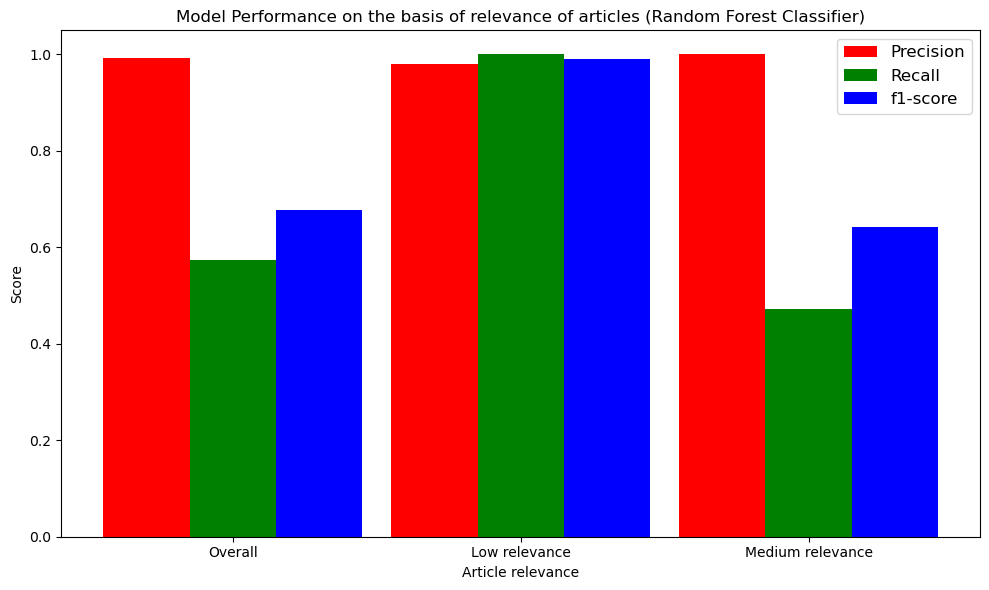

In [ ]:
crfc = classification_report(y_test, yrfc,output_dict=True)
plt.figure()
bar_width = 0.3
x = np.arange(3)
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width, [crfc['macro avg']['precision'], crfc['1']['precision'],crfc['2']['precision']], width=bar_width, color='green', label='Precision')
plt.bar(x, [crfc['macro avg']['recall'], crfc['1']['recall'],crfc['2']['recall']], width=bar_width, color='orange', label='Recall')
plt.bar(x + bar_width, [crfc['macro avg']['f1-score'], crfc['1']['f1-score'],crfc['2']['f1-score']], width=bar_width, color='blue', label='f1-score')

plt.xticks(x, ['Overall', 'Low relevance','Medium relevance'])
plt.xlabel('Article relevance')
plt.ylabel('Score')
plt.title('Model Performance on the basis of relevance of articles (Random Forest Classifier)')
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

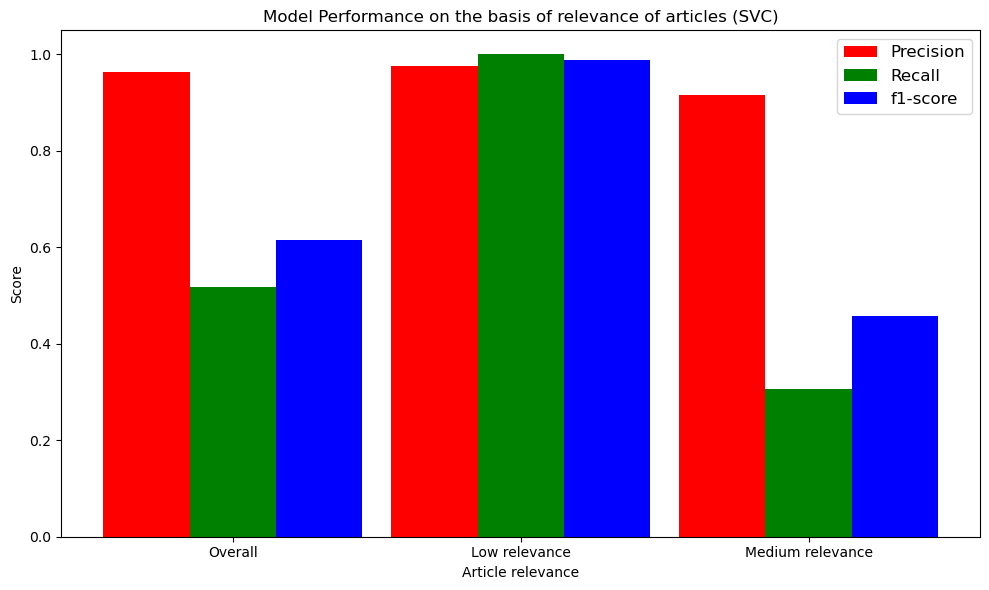

In [ ]:
crsvc = classification_report(y_test, yclf,output_dict=True)
plt.figure()
bar_width = 0.3
x = np.arange(3)
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width, [crsvc['macro avg']['precision'], crsvc['1']['precision'],crsvc['2']['precision']], width=bar_width, color='green', label='Precision')
plt.bar(x, [crsvc['macro avg']['recall'], crsvc['1']['recall'],crsvc['2']['recall']], width=bar_width, color='orange', label='Recall')
plt.bar(x + bar_width, [crsvc['macro avg']['f1-score'], crsvc['1']['f1-score'],crsvc['2']['f1-score']], width=bar_width, color='blue', label='f1-score')

plt.xticks(x, ['Overall', 'Low relevance','Medium relevance'])
plt.xlabel('Article relevance')
plt.ylabel('Score')
plt.title('Model Performance on the basis of relevance of articles (SVC)')
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

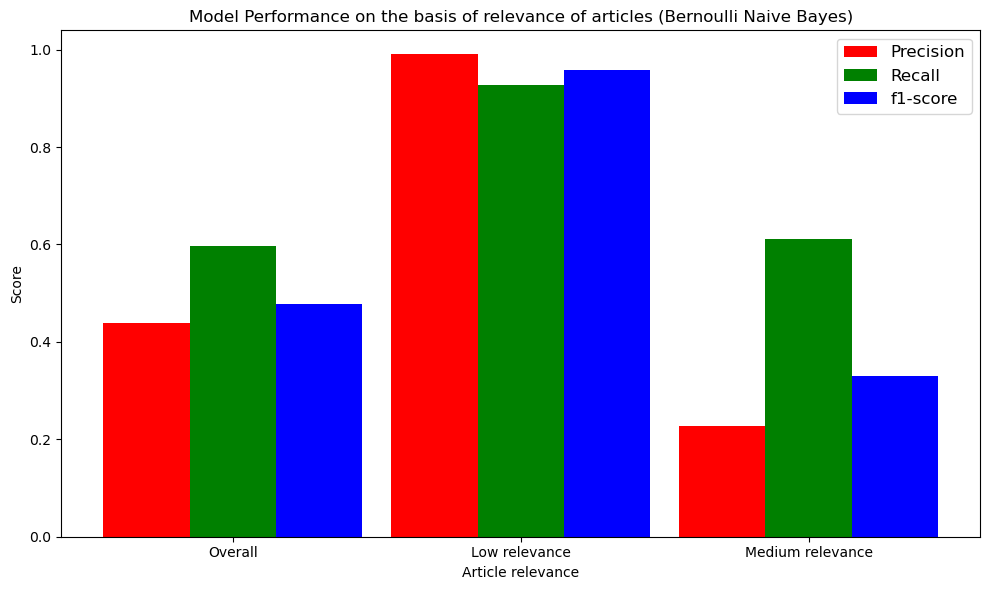

In [ ]:
crbnb = classification_report(y_test, ybnb,output_dict=True)
plt.figure()
bar_width = 0.3
x = np.arange(3)
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width, [crbnb['macro avg']['precision'], crbnb['1']['precision'],crbnb['2']['precision']], width=bar_width, color='green', label='Precision')
plt.bar(x, [crbnb['macro avg']['recall'], crbnb['1']['recall'],crbnb['2']['recall']], width=bar_width, color='orange', label='Recall')
plt.bar(x + bar_width, [crbnb['macro avg']['f1-score'], crbnb['1']['f1-score'],crbnb['2']['f1-score']], width=bar_width, color='blue', label='f1-score')

plt.xticks(x, ['Overall', 'Low relevance','Medium relevance'])
plt.xlabel('Article relevance')
plt.ylabel('Score')
plt.title('Model Performance on the basis of relevance of articles (Bernoulli Naive Bayes)')
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()